In [1]:
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Understanding Data 

In [4]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

From this we can understand that this is a catagorical field(Passenger class).
We will create dummy for this.

In [5]:
Pclass = pd.get_dummies(train[['Pclass']].astype(str),drop_first=True)
train =  pd.concat([train,Pclass], axis=1 )
train = train.drop(['Pclass'], 1)
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


#### sex

In [6]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
train.Sex = train.Sex.apply(lambda x: 1 if x=='female' else 0)
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1


### sibsp

In [8]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### parch

In [9]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### embarked

In [10]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
Embarked = pd.get_dummies(train[['Embarked']],drop_first=True)
train =  pd.concat([train,Embarked], axis=1 )
train = train.drop(['Embarked'], 1)
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1


In [12]:
null_df = round(100*(train.isnull().sum()/len(train.index)), 2).to_frame()
null_df.columns = {'Null Data'}

null_df = null_df[null_df['Null Data']>10]
null_df

,Null Data
Age,19.87
Cabin,77.10


In [13]:
print(train.shape)

(891, 14)


In [14]:
print(train['Age'].mean())
train['Age'].fillna(train['Age'].mean(), inplace = True)
print(train['Age'].mean())

29.69911764705882
29.699117647058763


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Pclass_2     891 non-null    uint8  
 11  Pclass_3     891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(4)
memory usage: 73.2+ KB


In [16]:
train = train.drop(['Name','Ticket','Cabin'], 1)
train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,0,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,1,26.0,0,0,7.9250,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,0,35.0,0,0,8.0500,0,1,0,1


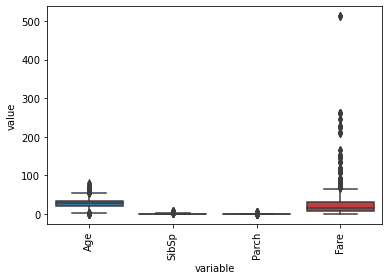

In [17]:
scalling_variables = [ 'Age', 'SibSp', 'Parch', 'Fare']
df = train[scalling_variables]

d= pd.melt(df)

d.value=d.value.astype('float64')


ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
train[scalling_variables] = scaler.fit_transform(train[scalling_variables])
train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,0,-0.592481,0.432793,-0.473674,-0.502445,0,1,0,1
1,2,1,1,0.638789,0.432793,-0.473674,0.786845,0,0,0,0
2,3,1,1,-0.284663,-0.474545,-0.473674,-0.488854,0,1,0,1
3,4,1,1,0.407926,0.432793,-0.473674,0.420730,0,0,0,1
4,5,0,0,0.407926,-0.474545,-0.473674,-0.486337,0,1,0,1


## Model building

In [20]:
import statsmodels.api as sm

### X & Y creation 

In [21]:
X_Train = train.drop(['PassengerId','Survived'], 1)
Y_Train = train.Survived

In [22]:
X1_sm = sm.add_constant(X_Train)
logm1 = sm.GLM(Y_Train,X1_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.07
Date:                Tue, 29 Dec 2020   Deviance:                       784.14
Time:                        23:03:48   Pearson chi2:                     907.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.271      0.371      0.711      -0.430       0.631
Sex            2.7159      0.201     13.501      0.000       2.322       3.110
Age           -0.5087      0.102     -4.971      0.000      -0.709      -0.308
SibSp         -0.3555      0.121     -2.942      0.003      -0.592      -0.119
Parch         -0.0776      0.096     -0.809      0.418      -0.266       0.110
Fare           0.1127      0.123      0.920      0.358      -0.127       0.353
Pclass_2      -0.9270      0.298     -3.111      0.002      -1.511      -0.343
Pclass_3      -2.1527      0.298     -7.227      0.000      -2.736      -1.569
Embarked_Q    -0.0378      0.381     -0.099      0.921      -0.785       0.710
Embarked_S    -0.4527      0.239     -1.891      0.059      -0.922       0.016
==============================================================================
"""

In [23]:
X_Train.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [42]:
col = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
        'Embarked_S']

In [43]:
X2_sm = sm.add_constant(X_Train[col])
logm2 = sm.GLM(Y_Train,X2_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.08
Date:                Tue, 29 Dec 2020   Deviance:                       784.15
Time:                        23:07:26   Pearson chi2:                     907.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0931      0.260      0.358      0.720      -0.417       0.603
Sex            2.7137      0.200     13.575      0.000       2.322       3.106
Age           -0.5094      0.102     -4.989      0.000      -0.709      -0.309
SibSp         -0.3555      0.121     -2.943      0.003      -0.592      -0.119
Parch         -0.0768      0.096     -0.804      0.422      -0.264       0.110
Fare           0.1134      0.122      0.927      0.354      -0.126       0.353
Pclass_2      -0.9298      0.297     -3.135      0.002      -1.511      -0.349
Pclass_3      -2.1590      0.291     -7.421      0.000      -2.729      -1.589
Embarked_S    -0.4407      0.207     -2.132      0.033      -0.846      -0.036
==============================================================================
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_Train[col].columns
vif['VIF'] = [variance_inflation_factor(X_Train[col].values, i) for i in range(X_Train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Embarked_S,2.88
6,Pclass_3,2.70
5,Pclass_2,1.85
0,Sex,1.52
4,Fare,1.34
3,Parch,1.29
2,SibSp,1.27
1,Age,1.15


### Prediction Table 

In [45]:
Y_Train_pred = res.predict(X2_sm) #'PassengerId','Survived'
Y_Train_final = pd.DataFrame({'Survived':train['Survived'], 'prob':Y_Train_pred})
Y_Train_final.head()

,Survived,prob
0,0,0.084764
1,1,0.920788
2,1,0.622868
3,1,0.889780
4,0,0.071459


## Finding Optimal Cut-off point

In [46]:
from sklearn import metrics

In [47]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_Train_final[i]= Y_Train_final.prob.map(lambda x: 1 if x > i else 0)
Y_Train_final.head()

,Survived,prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.084764,1,0,0,0,0,0,0,0,0,0
1,1,0.920788,1,1,1,1,1,1,1,1,1,1
2,1,0.622868,1,1,1,1,1,1,1,0,0,0
3,1,0.889780,1,1,1,1,1,1,1,1,1,0
4,0,0.071459,1,0,0,0,0,0,0,0,0,0


In [48]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
for i in numbers:
    cm1 = metrics.confusion_matrix(Y_Train_final.Survived, Y_Train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.383838     1.000000     0.000000
0.1   0.1  0.560045     0.926901     0.331512
0.2   0.2  0.710438     0.853801     0.621129
0.3   0.3  0.771044     0.818713     0.741348
0.4   0.4  0.791246     0.760234     0.810565
0.5   0.5  0.802469     0.701754     0.865209
0.6   0.6  0.820426     0.654971     0.923497
0.7   0.7  0.790123     0.502924     0.969035
0.8   0.8  0.760943     0.391813     0.990893
0.9   0.9  0.693603     0.210526     0.994536


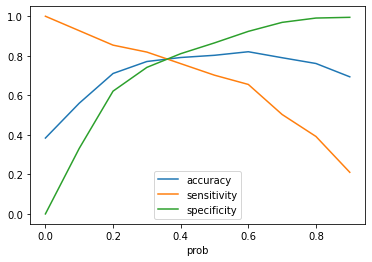

In [49]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [50]:
print(metrics.accuracy_score(Y_Train_final.Survived, Y_Train_final[0.4]))

0.7912457912457912


In [51]:
Y_Train_final['final_predicted'] = Y_Train_final.prob.map( lambda x: 1 if x > 0.4 else 0)

Y_Train_final.head()

,Survived,prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.084764,1,0,0,0,0,0,0,0,0,0,0
1,1,0.920788,1,1,1,1,1,1,1,1,1,1,1
2,1,0.622868,1,1,1,1,1,1,1,0,0,0,1
3,1,0.889780,1,1,1,1,1,1,1,1,1,0,1
4,0,0.071459,1,0,0,0,0,0,0,0,0,0,0


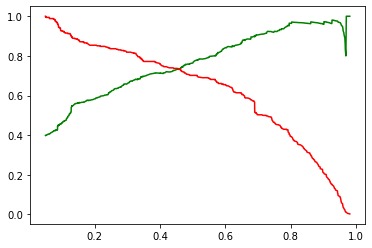

In [52]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(Y_Train_final.Survived, Y_Train_final.prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [53]:
Y_Train_final['final_predicted'] = Y_Train_final.prob.map( lambda x: 1 if x > 0.49 else 0)
print(metrics.accuracy_score(Y_Train_final.Survived, Y_Train_final['final_predicted']))

0.8002244668911336


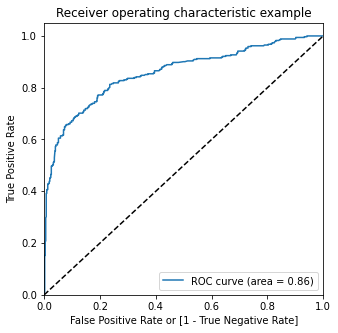

In [54]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( Y_Train_final.Survived, Y_Train_final.prob, drop_intermediate = False )
draw_roc(Y_Train_final.Survived, Y_Train_final.prob)

# Create Result

In [55]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
Pclass = pd.get_dummies(test_df[['Pclass']].astype(str),drop_first=True)
test_df =  pd.concat([test_df,Pclass], axis=1 )
test_df = test_df.drop(['Pclass'], 1)

test_df.Sex = test_df.Sex.apply(lambda x: 1 if x=='female' else 0)

Embarked = pd.get_dummies(test_df[['Embarked']],drop_first=True)
test_df =  pd.concat([test_df,Embarked], axis=1 )
test_df = test_df.drop(['Embarked'], 1)

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

test_df = test_df.drop(['Name','Ticket','Cabin'], 1)
test_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,0,34.5,0,0,7.8292,0,1,1,0
1,893,1,47.0,1,0,7.0000,0,1,0,1
2,894,0,62.0,0,0,9.6875,1,0,1,0
3,895,0,27.0,0,0,8.6625,0,1,0,1
4,896,1,22.0,1,1,12.2875,0,1,0,1


## scale test data 

In [57]:
test_df[scalling_variables] = scaler.transform(test_df[scalling_variables])
test_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,0,0.369449,-0.474545,-0.473674,-0.490783,0,1,1,0
1,893,1,1.331378,0.432793,-0.473674,-0.507479,0,1,0,1
2,894,0,2.485693,-0.474545,-0.473674,-0.453367,1,0,1,0
3,895,0,-0.207709,-0.474545,-0.473674,-0.474005,0,1,0,1
4,896,1,-0.592481,0.432793,0.767630,-0.401017,0,1,0,1


## Predict test data

In [58]:
X_test = test_df[col]
X_test.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_S
0,0,0.369449,-0.474545,-0.473674,-0.490783,0,1,0
1,1,1.331378,0.432793,-0.473674,-0.507479,0,1,1
2,0,2.485693,-0.474545,-0.473674,-0.453367,1,0,0
3,0,-0.207709,-0.474545,-0.473674,-0.474005,0,1,1
4,1,-0.592481,0.432793,0.767630,-0.401017,0,1,1


In [59]:
X_test_sm = sm.add_constant(X_test)
Y_test_pred = res.predict(X_test_sm)


Y_Test_final = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived_Prob':Y_test_pred})
Y_Test_final['Survived'] = Y_Test_final.Survived_Prob.map(lambda x: 1 if x > 0.49 else 0)
Y_Test_final =Y_Test_final.drop('Survived_Prob',1)
compression_opts = dict(method='zip',
                        archive_name='out_49.csv')  
Y_Test_final.to_csv('out_Age_Mean.zip', index=False,
          compression=compression_opts)  